# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Your code here
import pandas as pd
import numpy as np

data = pd.read_csv('PS_20174392719_1491204439457_log.csv')

data = data.sample(n=100000)
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1517022,153,PAYMENT,24678.78,C2100105279,0.00,0.00,M2141341336,0.00,0.00,0,0
1009117,46,CASH_IN,19866.49,C1152178406,3349986.53,3369853.02,C885597205,65976.05,46109.56,0,0
4393873,321,PAYMENT,4333.88,C1244537166,169473.81,165139.93,M1839816641,0.00,0.00,0,0
2697318,211,PAYMENT,20413.45,C1785898552,51128.00,30714.55,M1567781138,0.00,0.00,0,0
4321617,308,PAYMENT,38136.21,C544753471,78620.00,40483.79,M1039669999,0.00,0.00,0,0


In [2]:
data.shape

(100000, 11)

In [3]:
dsnull = data.isnull().sum()
print(dsnull) # data.isnull().values.any()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [4]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.019710,-0.011078,-0.011316,0.025709,0.023710,0.024895,0.004036
amount,0.019710,1.000000,-0.002161,-0.007374,0.314773,0.487807,0.081400,0.049605
oldbalanceOrg,-0.011078,-0.002161,1.000000,0.998730,0.072119,0.047360,0.011145,0.020836
newbalanceOrig,-0.011316,-0.007374,0.998730,1.000000,0.073669,0.046752,-0.008018,0.020551
oldbalanceDest,0.025709,0.314773,0.072119,0.073669,1.000000,0.974350,-0.000154,-0.001032
newbalanceDest,0.023710,0.487807,0.047360,0.046752,0.974350,1.000000,0.009180,-0.001055
isFraud,0.024895,0.081400,0.011145,-0.008018,-0.000154,0.009180,1.000000,0.092396
isFlaggedFraud,0.004036,0.049605,0.020836,0.020551,-0.001032,-0.001055,0.092396,1.000000


In [5]:
import seaborn as sns

correlation = data.corr()
sns.heatmap(correlation, cmap='Greens')

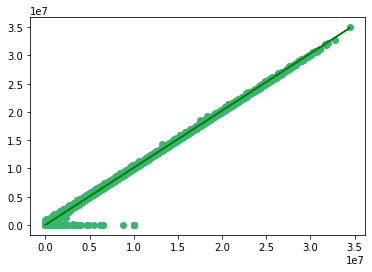

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = data['oldbalanceOrg'].values.reshape(-1, 1)
y = data['newbalanceOrig'].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, c='mediumseagreen')
plt.plot(X, y_pred, c='green')
plt.show()

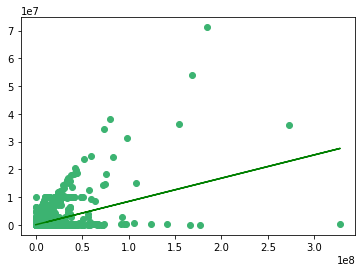

In [7]:
X = data['newbalanceDest'].values.reshape(-1, 1)
y = data['amount'].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, c='mediumseagreen')
plt.plot(X, y_pred, c='green')
plt.show()

### What is the distribution of the outcome? 

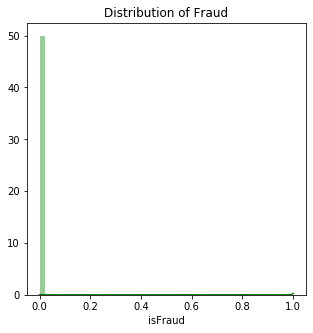

In [8]:
# Your response here
plt.figure(figsize=(5,5))
plt.title('Distribution of Fraud')
ax = sns.distplot(data['isFraud'], color = 'g')

In [9]:
data['isFraud'].value_counts()

0    99883
1      117
Name: isFraud, dtype: int64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [10]:
data.dtypes # step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [11]:
to_drop =['type','nameDest','nameOrig', 'isFlaggedFraud']
data.drop(columns=to_drop,inplace=True,axis=1)

In [12]:
data.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1517022,153,24678.78,0.00,0.00,0.00,0.00,0
1009117,46,19866.49,3349986.53,3369853.02,65976.05,46109.56,0
4393873,321,4333.88,169473.81,165139.93,0.00,0.00,0
2697318,211,20413.45,51128.00,30714.55,0.00,0.00,0
4321617,308,38136.21,78620.00,40483.79,0.00,0.00,0
25738,8,2336.74,0.00,0.00,0.00,0.00,0
1193525,132,206891.80,1074.00,0.00,0.00,206891.80,0
3113009,235,8870.44,0.00,0.00,4276346.59,4285217.03,0
5088949,355,90652.89,0.00,0.00,71746175.13,71836828.02,0
5605199,394,23591.51,439997.79,416406.28,0.00,0.00,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [13]:
# Your code here

from sklearn.model_selection import train_test_split

# Your code here:
y = data['isFraud']
X = data.drop(['isFraud'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
y_train.unique()

array([0, 1], dtype=int64)

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train) 
acc = lr.score(X_test,y_test)*100                            

print(f"Logistic Regression Test Accuracy {round(acc, 2)}%")

C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Test Accuracy 99.96%


C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Now pick a model of your choice and evaluate its accuracy.

In [24]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print(f"3 neighbors KNN Score: {round(acc,2)}%")

3 neighbors KNN Score: 99.93%


### Which model worked better and how do you know?